**<center><font size = "6">Hyperparameters Support Vector Machine Classifier<center>**
***

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parámetros-por-defecto" data-toc-modified-id="Parámetros-por-defecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parámetros por defecto</a></span></li><li><span><a href="#Loss=hinge" data-toc-modified-id="Loss=hinge-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loss=hinge</a></span></li><li><span><a href="#Dual-=-False,-fit_intercept=False" data-toc-modified-id="Dual-=-False,-fit_intercept=False-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dual = False, fit_intercept=False</a></span></li><li><span><a href="#Loss=hinge,-fit_intercept=False" data-toc-modified-id="Loss=hinge,-fit_intercept=False-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loss=hinge, fit_intercept=False</a></span></li><li><span><a href="#Dual=False,-class_weight=Dict" data-toc-modified-id="Dual=False,-class_weight=Dict-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dual=False, class_weight=Dict</a></span></li><li><span><a href="#Penalty=l1,-dual=False,-fit_intercept=False" data-toc-modified-id="Penalty=l1,-dual=False,-fit_intercept=False-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Penalty=l1, dual=False, fit_intercept=False</a></span></li><li><span><a href="#Penalty=l1,-dual-=-False,-class_weight=Dict" data-toc-modified-id="Penalty=l1,-dual-=-False,-class_weight=Dict-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Penalty=l1, dual = False, class_weight=Dict</a></span></li></ul></div>

***

In [1]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import pickle
import matplotlib.pyplot as plt
import numpy as np

# FORMATO DE PLOTS
plt.style.use('bmh')

X_train_smt = pickle.load(open("saved_feats/X_train_smt", "rb"))
X_test = pickle.load(open("saved_feats/X_test_c", "rb"))
y_train_smt = pickle.load(open("saved_feats/y_train_smt", "rb"))
y_test = pickle.load(open("saved_feats/y_test_c", "rb"))

## Parámetros por defecto

In [2]:
clf_svc = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr',
                    fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf_svc.fit(X_train_smt, y_train_smt)
pred_svc = clf_svc.predict(X_test)
estim_prob_svc = np.array(clf_svc.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc = np.exp(estim_prob_svc)/np.sum(np.exp(estim_prob_svc),
                                              axis=1, keepdims=True)  # softmax after the voting

In [3]:
print('Predicted classes:', clf_svc.classes_)
print('Average accuracy :', np.mean(pred_svc == y_test)*100)
print('Train accuracy :', (clf_svc.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 84.82707326143549
Train accuracy : 94.35432315806297
Test accuracy : 84.82707326143549

 CONFUSION MATRIX
[[  13   43    4]
 [ 188 2266  129]
 [   6   38    2]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.22      0.10        60
     Estable       0.97      0.88      0.92      2583
        Sube       0.01      0.04      0.02        46

    accuracy                           0.85      2689
   macro avg       0.35      0.38      0.35      2689
weighted avg       0.93      0.85      0.89      2689



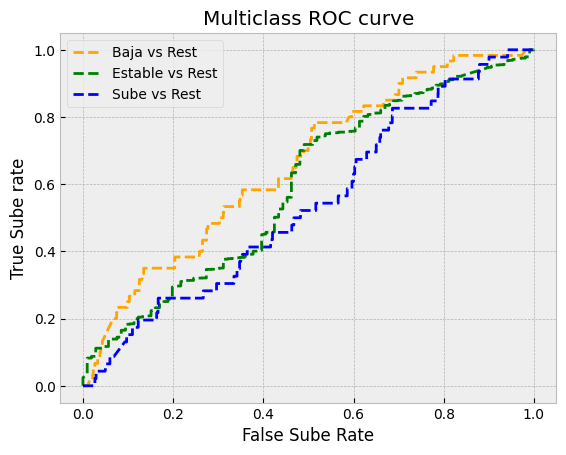

In [4]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Loss=hinge

In [5]:
clf_svc_2 = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf_svc_2.fit(X_train_smt, y_train_smt)
pred_svc_2 = clf_svc_2.predict(X_test)
estim_prob_svc_2 = np.array(clf_svc_2.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_2 = np.exp(estim_prob_svc_2)/np.sum(np.exp(estim_prob_svc_2),
                                                  axis=1, keepdims=True)  # softmax after the voting

C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
print('Predicted classes:', clf_svc_2.classes_)
print('Average accuracy :', np.mean(pred_svc_2 == y_test)*100)
print('Train accuracy :', (clf_svc_2.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_2.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_2))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_2))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 84.5667534399405
Train accuracy : 93.00982899152949
Test accuracy : 84.5667534399405

 CONFUSION MATRIX
[[  13   41    6]
 [ 196 2259  128]
 [   6   38    2]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.22      0.09        60
     Estable       0.97      0.87      0.92      2583
        Sube       0.01      0.04      0.02        46

    accuracy                           0.85      2689
   macro avg       0.35      0.38      0.34      2689
weighted avg       0.93      0.85      0.88      2689



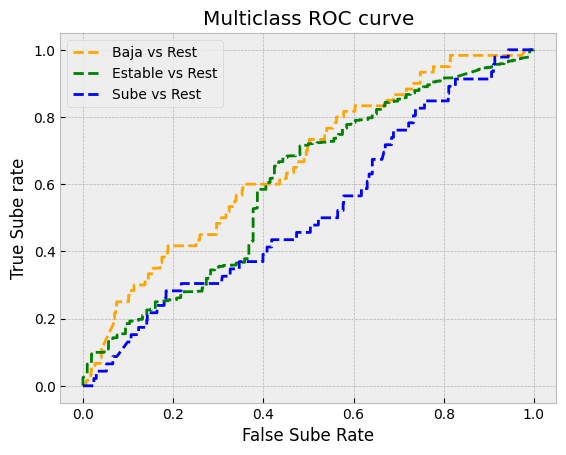

In [7]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_2[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_2[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_2[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Dual = False, fit_intercept=False

In [8]:
clf_svc_3 = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=False, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf_svc_3.fit(X_train_smt, y_train_smt)
pred_svc_3 = clf_svc_3.predict(X_test)
estim_prob_svc_3 = np.array(clf_svc_3.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_3 = np.exp(estim_prob_svc_3)/np.sum(np.exp(estim_prob_svc_3),
                                                  axis=1, keepdims=True)  # softmax after the voting

In [9]:
print('Predicted classes:', clf_svc_3.classes_)
print('Average accuracy :', np.mean(pred_svc_3 == y_test)*100)
print('Train accuracy :', (clf_svc_3.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_3.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_3))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_3))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 84.78988471550763
Train accuracy : 94.65398753396195
Test accuracy : 84.78988471550763

 CONFUSION MATRIX
[[  12   42    6]
 [ 184 2265  134]
 [   6   37    3]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.20      0.09        60
     Estable       0.97      0.88      0.92      2583
        Sube       0.02      0.07      0.03        46

    accuracy                           0.85      2689
   macro avg       0.35      0.38      0.35      2689
weighted avg       0.93      0.85      0.89      2689



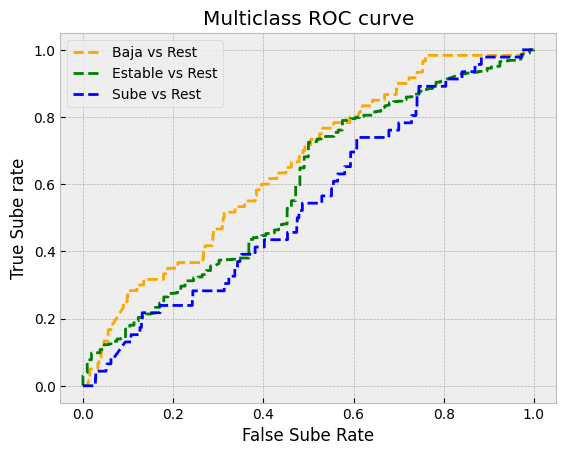

In [10]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_3[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_3[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_3[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Loss=hinge, fit_intercept=False

In [11]:
clf_svc_4 = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=False, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf_svc_4.fit(X_train_smt, y_train_smt)
pred_svc_4 = clf_svc_4.predict(X_test)
estim_prob_svc_4 = np.array(clf_svc_4.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_4 = np.exp(estim_prob_svc_4)/np.sum(np.exp(estim_prob_svc_4),
                                                  axis=1, keepdims=True)  # softmax after the voting

C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
print('Predicted classes:', clf_svc_4.classes_)
print('Average accuracy :', np.mean(pred_svc_4 == y_test)*100)
print('Train accuracy :', (clf_svc_4.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_4.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_4))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_4))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 84.60394198586835
Train accuracy : 94.21048425763145
Test accuracy : 84.60394198586835

 CONFUSION MATRIX
[[  13   40    7]
 [ 190 2259  134]
 [   6   37    3]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.22      0.10        60
     Estable       0.97      0.87      0.92      2583
        Sube       0.02      0.07      0.03        46

    accuracy                           0.85      2689
   macro avg       0.35      0.39      0.35      2689
weighted avg       0.93      0.85      0.88      2689



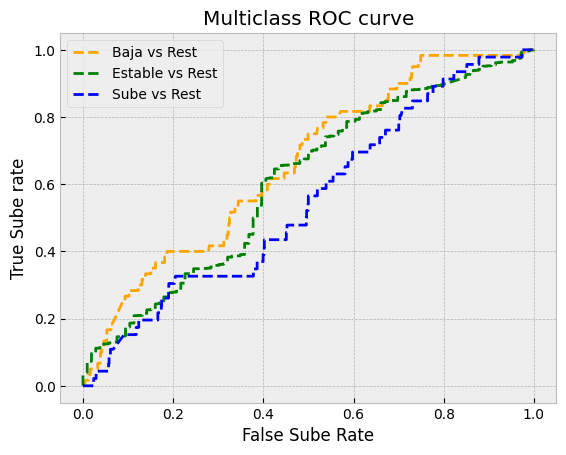

In [13]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_4[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_4[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_4[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Dual=False, class_weight=Dict

In [14]:
clf_svc_5 = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=True, intercept_scaling=1, verbose=0, random_state=None, max_iter=1000)
clf_svc_5.fit(X_train_smt, y_train_smt)
pred_svc_5 = clf_svc_5.predict(X_test)
estim_prob_svc_5 = np.array(clf_svc_5.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_5 = np.exp(estim_prob_svc_5)/np.sum(np.exp(estim_prob_svc_5),
                                                  axis=1, keepdims=True)  # softmax after the voting

In [15]:
print('Predicted classes:', clf_svc_5.classes_)
print('Average accuracy :', np.mean(pred_svc_5 == y_test)*100)
print('Train accuracy :', (clf_svc_5.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_5.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_5))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_5))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 84.82707326143549
Train accuracy : 94.35232539555697
Test accuracy : 84.82707326143549

 CONFUSION MATRIX
[[  13   43    4]
 [ 188 2266  129]
 [   6   38    2]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.22      0.10        60
     Estable       0.97      0.88      0.92      2583
        Sube       0.01      0.04      0.02        46

    accuracy                           0.85      2689
   macro avg       0.35      0.38      0.35      2689
weighted avg       0.93      0.85      0.89      2689



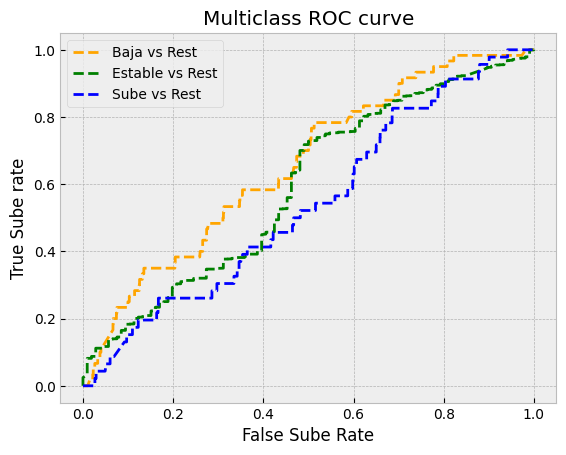

In [16]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_5[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_5[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_5[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Penalty=l1, dual=False, fit_intercept=False

In [17]:
clf_svc_6 = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=False, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf_svc_6.fit(X_train_smt, y_train_smt)
pred_svc_6 = clf_svc_6.predict(X_test)
estim_prob_svc_6 = np.array(clf_svc_6.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_6 = np.exp(estim_prob_svc_6)/np.sum(np.exp(estim_prob_svc_6),
                                                  axis=1, keepdims=True)  # softmax after the voting

C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
print('Predicted classes:', clf_svc_6.classes_)
print('Average accuracy :', np.mean(pred_svc_6 == y_test)*100)
print('Train accuracy :', (clf_svc_6.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_6.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_6))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_6))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 85.01301599107475
Train accuracy : 94.69594054658782
Test accuracy : 85.01301599107475

 CONFUSION MATRIX
[[  16   40    4]
 [ 197 2269  117]
 [   8   37    1]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.07      0.27      0.11        60
     Estable       0.97      0.88      0.92      2583
        Sube       0.01      0.02      0.01        46

    accuracy                           0.85      2689
   macro avg       0.35      0.39      0.35      2689
weighted avg       0.93      0.85      0.89      2689



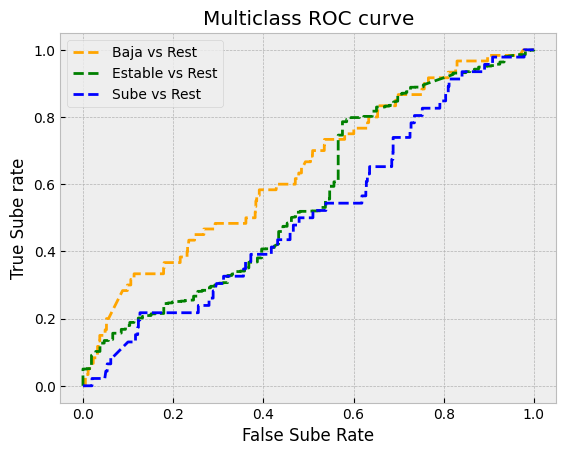

In [19]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_6[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_6[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_6[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Penalty=l1, dual = False, class_weight=Dict

In [20]:
clf_svc_7 = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=True, intercept_scaling=1, verbose=0, random_state=None, max_iter=1000)
clf_svc_7.fit(X_train_smt, y_train_smt)
pred_svc_7 = clf_svc_7.predict(X_test)
estim_prob_svc_7 = np.array(clf_svc_7.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_7 = np.exp(estim_prob_svc_7)/np.sum(np.exp(estim_prob_svc_7),
                                                  axis=1, keepdims=True)  # softmax after the voting

C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:
print('Predicted classes:', clf_svc_7.classes_)
print('Average accuracy :', np.mean(pred_svc_7 == y_test)*100)
print('Train accuracy :', (clf_svc_7.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_7.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_7))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_7))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 84.38081071030122
Train accuracy : 94.60803899632411
Test accuracy : 84.38081071030122

 CONFUSION MATRIX
[[  15   40    5]
 [ 211 2253  119]
 [   9   36    1]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.06      0.25      0.10        60
     Estable       0.97      0.87      0.92      2583
        Sube       0.01      0.02      0.01        46

    accuracy                           0.84      2689
   macro avg       0.35      0.38      0.34      2689
weighted avg       0.93      0.84      0.88      2689



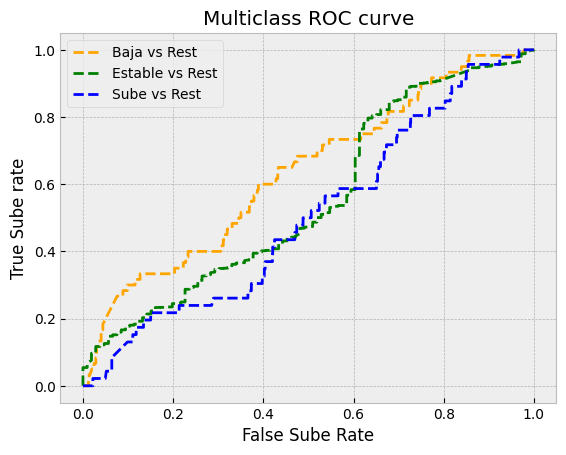

In [22]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_7[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_7[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_7[:, 2], pos_label='Sube')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

# Grid Search

In [26]:
param_grid_svc = {'C': [0.1, 1, 10, 100]}
grid_svc = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False, class_weight=None),
                        param_grid_svc, scoring='accuracy', refit=True, verbose=2)
grid_svc.fit(X_train_smt, y_train_smt)
print("Mejor modelo predicho: " + str(grid_svc.best_estimator_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   3.8s
[CV] END ..............................................C=0.1; total time=   3.6s
[CV] END ..............................................C=0.1; total time=   3.5s
[CV] END ..............................................C=0.1; total time=   3.6s
[CV] END ..............................................C=0.1; total time=   3.6s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................................C=1; total time=   8.8s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................................C=1; total time=   8.5s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................................C=1; total time=   8.8s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................................C=1; total time=   9.0s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................................C=1; total time=   9.2s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...............................................C=10; total time=   8.4s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...............................................C=10; total time=   8.5s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...............................................C=10; total time=   8.6s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...............................................C=10; total time=   8.6s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...............................................C=10; total time=   8.6s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..............................................C=100; total time=   8.8s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..............................................C=100; total time=   8.9s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..............................................C=100; total time=   9.0s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..............................................C=100; total time=   8.9s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..............................................C=100; total time=   8.9s
Mejor modelo predicho: LinearSVC(C=100, dual=False, penalty='l1')


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
param_grid_svc = {'loss': ['hinge', 'squared_hinge'], 'C': [0.1, 1, 10, 100]}
grid_svc = GridSearchCV(LinearSVC(penalty='l2', dual=False, class_weight=None),
                        param_grid_svc, scoring='accuracy', refit=True, verbose=2)
grid_svc.fit(X_train_smt, y_train_smt)
print("Mejor modelo predicho: " + str(grid_svc.best_estimator_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................................C=0.1, loss=hinge; total time=   1.3s
[CV] END ..................................C=0.1, loss=hinge; total time=   1.3s
[CV] END ..................................C=0.1, loss=hinge; total time=   1.3s
[CV] END ..................................C=0.1, loss=hinge; total time=   1.3s
[CV] END ..................................C=0.1, loss=hinge; total time=   1.3s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   3.0s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   3.2s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   3.2s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   3.1s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   3.1s
[CV] END ....................................C=1, loss=hinge; total time=   1.3s
[CV] END ....................................C=1,

C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..........................C=100, loss=squared_hinge; total time=  15.5s


C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..........................C=100, loss=squared_hinge; total time=  15.4s
[CV] END ..........................C=100, loss=squared_hinge; total time=  15.4s
[CV] END ..........................C=100, loss=squared_hinge; total time=  14.2s


C:\Dev\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Dev\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Dev\Python311\Lib\site-packages\sklearn\svm\_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
                                           ^^^^^^^^^^^^^^^
  File "C:\Dev\Python311\Lib\site-packages\sklearn\svm\_base.py", line 1223, in _fit_liblinear
    solver_type = _get_libl

Mejor modelo predicho: LinearSVC(C=100, dual=False)
